# Trends in wine industry - Pinot Noir

## 

### We will try to answer following questions:

1. What are the best value Pinot Noir wines? Max rating and min price
2. What are the twitter handles of the reviewers with the most reviews for Pinot Noir category?
3. What countries produce the most  Pinot Noirs?
4. Is there any trend/relation between the rating and price in Pinot Noir category?
5. Find Price/Rating Comparison For Top 4 Producers of Pinot Noir

In [1]:
import pandas as pd
import numpy as np

In [5]:
wine = pd.read_csv('/Users/markouskokovic/Downloads/wine-reviews/winemag-data-130k-v2.csv', index_col=0)
wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# 1. What are the best value Pinot Noirs? Max rating and min price

In [27]:
pinot_noir = wine[wine.variety == 'Pinot Noir']
best_value_vines = pinot_noir.groupby('points')['title', 'price'].min()
best_value_vines.rename(columns={'title': 'Wine name', 'price': 'Price'})


,Wine name,Price
points,,
80,Amity 1999 Eco Wine Cattrall Brothers Pinot No...,7.0
81,Amadores 2010 Pinot Noir (Mendoza),7.0
82,24 Knots 2009 Pinot Noir (California),7.0
83,10Span 2011 Pinot Noir (Santa Barbara County),5.0
84,3Fools 2008 Fools Gold Pinot Noir (Willamette ...,7.0
85,60 Souls 2014 Pinot Noir (Willamette Valley),7.0
86,2 Lads 2013 D. Cuvée Pinot Noir (Old Mission P...,7.0
87,2 Lads 2013 Pinot Noir (Old Mission Peninsula),7.0
88,A Blooming Hill Vineyard 2014 Trouble Pinot No...,8.0


Assuming that wine ratings(points) are given based on quality of the wine and that is not influenced by the price of the particular wine, we can see that top quality wines (95-100 points) could be purchased for 22$ - 75$

# 2. What are the twitter handles of the reviewers with the most reviews for Pinot Noir category?



In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

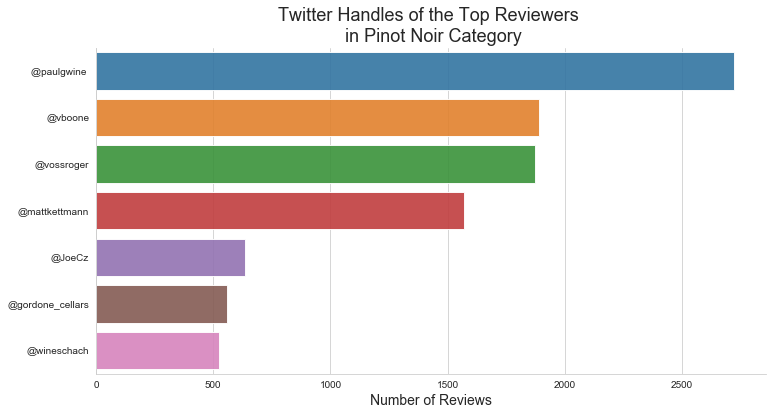

In [54]:
reviewers = pinot_noir.taster_twitter_handle.value_counts()[:7]

plt.figure(figsize=(12,6))
sns.barplot(reviewers.values, reviewers.index,
           alpha=0.9)
plt.title('Twitter Handles of the Top Reviewers \n in Pinot Noir Category', fontsize=18)
plt.xlabel('Number of Reviews', fontsize=14)
sns.despine()
plt.show()



# 3. What countries produce the most  Pinot Noirs?



In [47]:
pn_country = pinot_noir.country.value_counts()[:14]

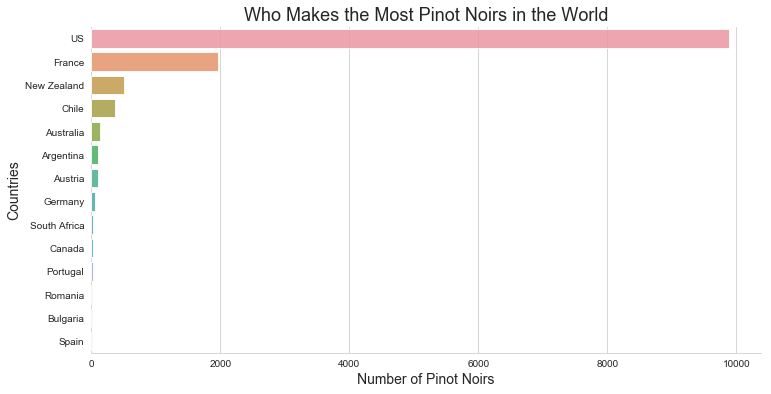

In [53]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.barplot(pn_country.values, pn_country.index,
           alpha=0.85)
plt.title('Who Makes the Most Pinot Noirs in the World', fontsize=18)
plt.xlabel('Number of Pinot Noirs', fontsize=14)
plt.ylabel('Countries', fontsize=14)
sns.despine(right=True, left=True)
plt.show()

# 4. Is there any trend/relation between the rating and price of Pinot Noirs?

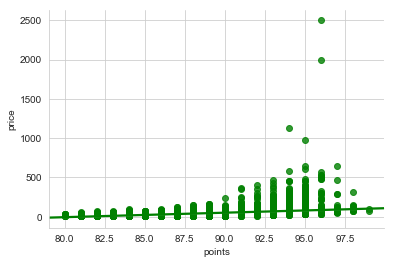

In [63]:
sns.regplot(x=pinot_noir["points"], y=pinot_noir["price"],
           color='green')
sns.despine(top=True, right=True)
plt.show()

Even though graph shows that Pinot Noirs tend to be more expensive as rating(points) goes up, we cannot conclude that correlation between price and rating is significant.

# 5. Find Price/Rating Comparison For Top 4 Producers of Pinot Noir

Note: We will analyze data for USA, France, Australia and New Zealand in a price range 0-500 $

In [64]:
pinot_noir.price.isna().sum()

485

In [68]:
mean = pinot_noir.price.mean()
pinot_noir['price'] = pinot_noir.price.fillna(mean)

/Users/markouskokovic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [103]:
top4 = pinot_noir[(pinot_noir.country.isin(['US', 'France', 'Australia', 'New Zealand'])) & 
                   (pinot_noir.price.between(0,500))]
top4.reset_index(drop = True).head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
1,US,"A sleek mix of tart berry, stem and herb, alon...",NaN,87,20.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Acrobat 2013 Pinot Noir (Oregon),Pinot Noir,Acrobat
2,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
3,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath
4,US,"A stiff, tannic wine, this slowly opens and br...",NaN,86,22.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Hawkins Cellars 2009 Pinot Noir (Willamette Va...,Pinot Noir,Hawkins Cellars


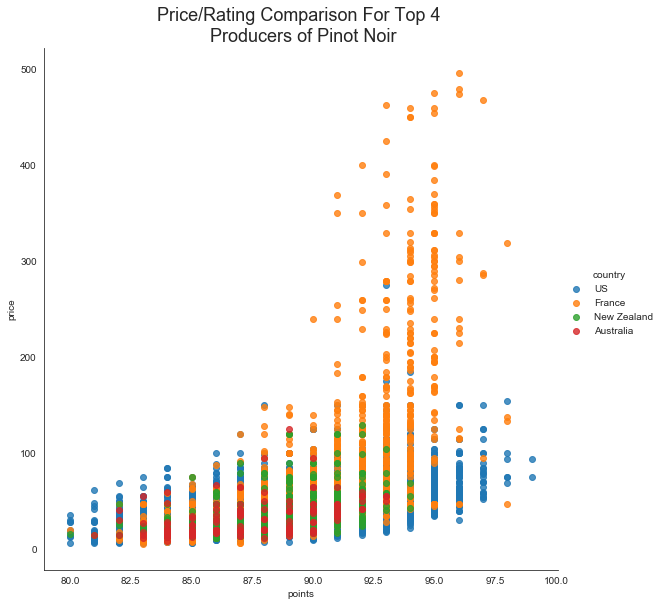

In [108]:

sns.lmplot(data = top4, x='points', y="price",
           fit_reg=False,
           height=8,
           hue = 'country')
plt.title('Price/Rating Comparison For Top 4 \n Producers of Pinot Noir', fontsize=18)
sns.set_style('white')
#sns.despine()

We can see here a couple trends:

* For under 100 dollars we can find Pinot Noirs from ranking of 80-100
    * While that is true, it is worth to note that for under 100 dollars and rating above 95 we can find Pinot Noirs only in US and France
    
* French Pinot Noirs dominate "high-end" Pinot Noir market with prices north of 175 dollars. Virtually all Pinot's in that category have a 90+ ranking.
